# 결정 트리 학습과 시각화

- 붓꽃 데이터에 결정 트리 분류기를 훈련시키기

In [15]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris=load_iris(as_frame=True)
X_iris=iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris=iris.target

tree_clf=DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [16]:
#훈련된 결정 트리를 시각화하고 파일로 저장하기
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=["petal length (cm)", "fetal width (cm)"],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

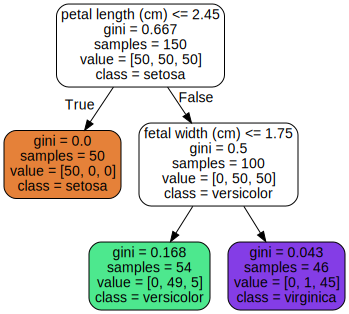

In [44]:
from graphviz import Source

Source.from_file("iris_tree.dot")

In [45]:
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [46]:
tree_clf.predict([[5, 1.5]])

array([1])

# 결정 트리의 규제

In [47]:
from sklearn.datasets import make_moons

X_moons, y_moons= make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf1= DecisionTreeClassifier(random_state=42)
tree_clf2=DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [48]:
#규제가 있는 결정 트리와 규제가 없는 결정 트리 평가하기
X_moons_test, y_moons_test= make_moons(n_samples=1000, noise=0.2, 
                                      random_state=43)

In [49]:
tree_clf1.score(X_moons_test, y_moons_test)

0.898

In [50]:
tree_clf2.score(X_moons_test, y_moons_test)

0.92

# 회귀 문제

In [51]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

#y=4(x-0.5)^2를 사용하여 만듦
np.random.seed(42)
X_quad= np.random.rand(200,1)-0.5
y_quad= X_quad**2+0.025*np.random.randn(200,1)

tree_reg=DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

# PCA 변환

In [52]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca_pipeline=make_pipeline(StandardScaler(), PCA())
X_iris_rotated=pca_pipeline.fit_transform(X_iris)
tree_clf_pca=DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_pca.fit(X_iris_rotated, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)